In [1]:
# importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

# import models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score 

## Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

In [3]:
# EDA

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

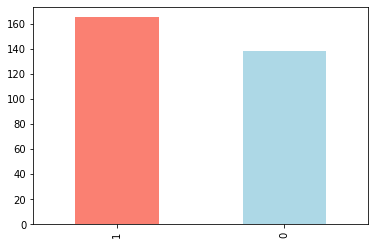

In [5]:
df['target'].value_counts().plot(kind = 'bar',color = ['salmon','lightblue'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Frequency according to sex

In [9]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# compare target and sex

pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

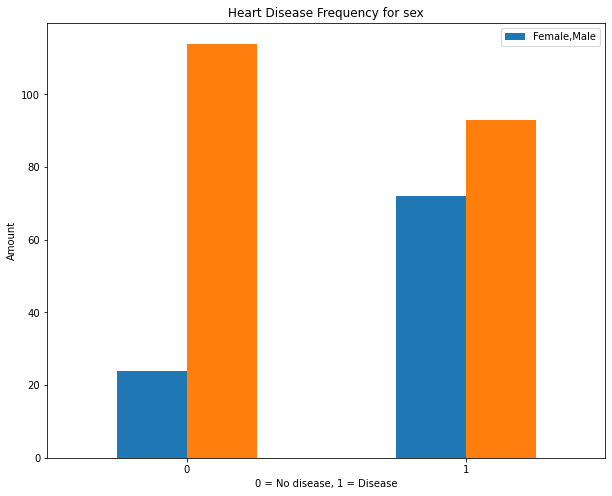

In [11]:
pd.crosstab(df['target'],df['sex']).plot(kind = 'bar',figsize = (10,8))
plt.title('Heart Disease Frequency for sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female,Male'])
plt.xticks(rotation = 0)

## age vs max heartrate

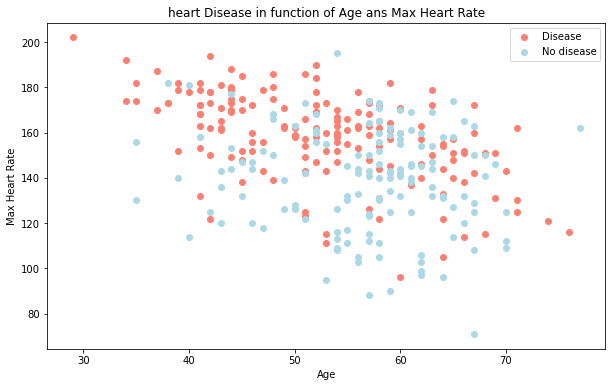

In [12]:
# creating another figure

#scatter with ositive examples
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

# scatter with  positive examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = 'lightblue')

# Add some helpful info
plt.title('heart Disease in function of Age ans Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No disease'])

<AxesSubplot:ylabel='Frequency'>

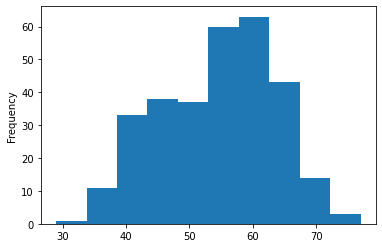

In [13]:
#check the distribution of the age column eith histogram

df.age.plot.hist()

In [14]:
### Heart disease frequency per Chest pain type

pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

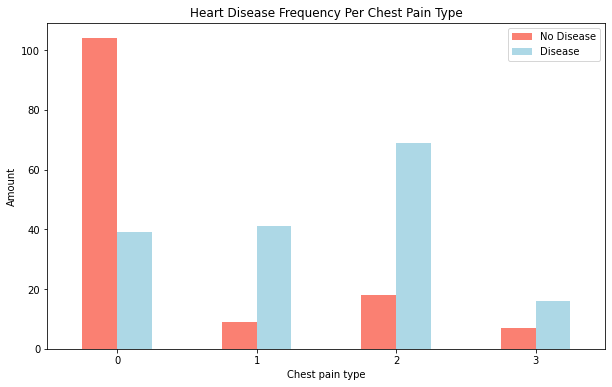

In [15]:
# make the crosstab more visual
pd.crosstab(df['cp'],df['target']).plot(kind = 'bar',
                                        figsize = (10,6),
                                        color = ['salmon','lightblue'])
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation = 0)

In [16]:
# make a correlation matrrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


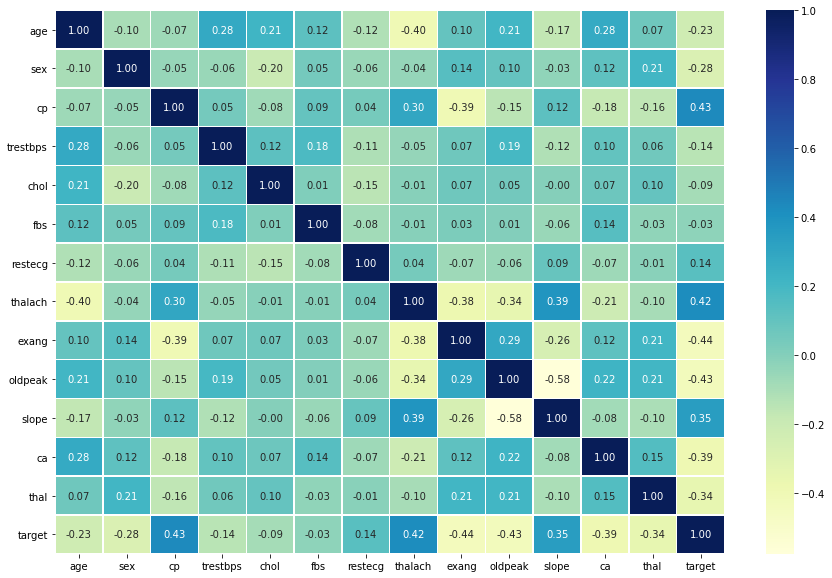

In [17]:
#pltting the corr matrix
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt = '.2f',
                cmap = 'YlGnBu')

# Modeling

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
# Split data into X and y
cols = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang']
X = df[cols]
#X = df.drop('target',axis = 1)
y = df['target']

In [20]:
X

,age,cp,trestbps,chol,fbs,restecg,thalach,exang
0,63,3,145,233,1,0,150,0
1,37,2,130,250,0,1,187,0
2,41,1,130,204,0,0,172,0
3,56,1,120,236,0,1,178,0
4,57,0,120,354,0,1,163,1
...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1
299,45,3,110,264,0,1,132,0
300,68,0,144,193,1,1,141,0
301,57,0,130,131,0,1,115,1


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
# split data into train and test set
cols = ['cp','trestbps','oldpeak','slope','chol','thalach','exang','age']
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [23]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [24]:
# put models in a dictionary

models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    X_train : Training data (no labels)
    X_test : Testing data(no labels)
    y_train : training data(no lables)
    y_test : test lables
    """
    np.random.seed(42)

    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    return model_scores

In [25]:
model_score = fit_and_score(models = models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_score

/Users/vismayrathod/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

<AxesSubplot:>

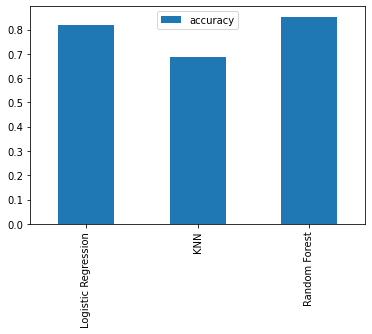

In [26]:
model_compare = pd.DataFrame(model_score, index=['accuracy'])
model_compare.T.plot.bar()

In [27]:
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.819672,0.688525,0.852459


* Hyperparamater tuning
* feature Importance
* Confussion Matrix
* Cross-valudation
* Precision 
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under the curve

# Hyperparamater tuning

In [28]:
# train KNN

train_score = []
test_score = []

neighbours = range(1,21)
knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors = i)

    #fit the algorithm

    knn.fit(X_train,y_train)

    train_score.append(knn.score(X_train,y_train))

    test_score.append(knn.score(X_test,y_test))

In [29]:
train_score

[1.0,
 0.8057851239669421,
 0.7768595041322314,
 0.7355371900826446,
 0.7644628099173554,
 0.7520661157024794,
 0.7396694214876033,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7231404958677686,
 0.6983471074380165,
 0.6983471074380165,
 0.6900826446280992,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6859504132231405,
 0.6652892561983471]

In [30]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7049180327868853,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6721311475409836]

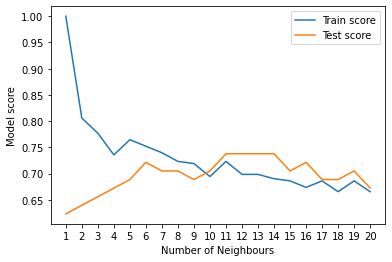

In [31]:
 plt.plot(neighbours,train_score, label='Train score')
 plt.plot(neighbours,test_score,label='Test score')
 plt.xticks(np.arange(1,21,1))
 plt.xlabel('Number of Neighbours')
 plt.ylabel('Model score')
 plt.legend()

# Hyperparameter tuning with  RandomizedSearchCV

We will tune:
* RandomForestClassifier
* Logistic Regression

In [32]:
log_reg_grid = {
    'C':np.logspace(-4,4,20),
    'solver':['liblinear']
}

rf_grid = {
    'n_estimators':np.arange(10,1000,50),
    'max_depth':[None,3,5,10],
    'min_samples_split':np.arange(2,20,20),
    'min_samples_leaf':np.arange(1,20,2)
}

In [33]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
            param_distributions=log_reg_grid,
            cv = 5,
            n_iter=20,
            verbose=True,
            n_jobs=-1)

rs_log_reg.fit(X_train,y_train)            

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 1.623776739188721}

In [35]:
rs_log_reg.score(X_test,y_test)

0.819672131147541

In [36]:
# tune RandomForest
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
        param_distributions=rf_grid,
        cv=5,
        verbose=True,
        n_iter=20,
        n_jobs=-1)

rs_rf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
#find best hyperparameters
rs_rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [38]:
rs_rf.score(X_test,y_test)

0.8360655737704918

# Hyperparamater tuning for LogisticRegressionn using GridSearchCV

In [39]:
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                        param_grid = log_reg_grid,
                        cv = 5,
                        verbose = True,
                        n_jobs = -1)
        
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [40]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [41]:
gs_log_reg.score(X_test,y_test) 

0.819672131147541

# Evaluating our tuned machine learning classifier

In [42]:
# make predictions with tuned model

y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [43]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

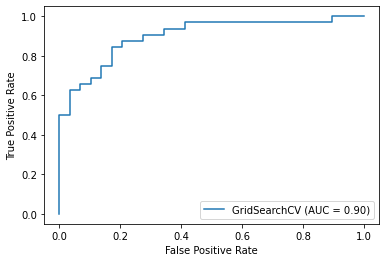

In [44]:
# plot ROC cure
plot_roc_curve(gs_log_reg,X_test,y_test)

In [45]:
# confusion matrix

print(confusion_matrix(y_test,y_preds))

[[24  5]
 [ 6 26]]


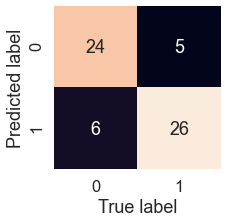

In [46]:
sns.set(font_scale = 1.5)
def plot_conf_matrix(y_test,y_preds):
    fig,ax = plt.subplots(figsize= (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                            annot = True,
                            cbar = False)                   
    plt.xlabel('True label')
    plt.ylabel('Predicted label')

plot_conf_matrix(y_test,y_preds)

In [47]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# Calculate evaluation metrics using cross-validation

In [48]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [49]:
clf = LogisticRegression(C = 0.20433597178569418,solver = 'liblinear')

In [50]:
# Cross-validated accuracy

cv_acc = cross_val_score(clf,X,y,cv = 5,scoring = 'accuracy')
cv_acc

array([0.7704918 , 0.7704918 , 0.7704918 , 0.76666667, 0.66666667])

In [51]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7489617486338797

In [52]:
# Cross-validated precision

cv_precision = cross_val_score(clf,X,y,cv = 5,scoring = 'precision')
cv_precision

array([0.75675676, 0.77142857, 0.80645161, 0.75675676, 0.6969697 ])

In [53]:
cv_precision = np.mean(cv_precision)
cv_precision

0.7576726789630017

In [54]:
# Cross-validated recall

cv_recall = cross_val_score(clf,X,y,cv = 5,scoring = 'recall')
cv_recall

array([0.84848485, 0.81818182, 0.75757576, 0.84848485, 0.6969697 ])

In [55]:
cv_recall = np.mean(cv_recall)
cv_recall

0.793939393939394

In [56]:
# Cross-validated f1

cv_f1 = cross_val_score(clf,X,y,cv = 5,scoring = 'f1')
cv_f1

array([0.8       , 0.79411765, 0.78125   , 0.8       , 0.6969697 ])

In [57]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.7744674688057043

<AxesSubplot:title={'center':'Cross-Validated classification metrics'}>

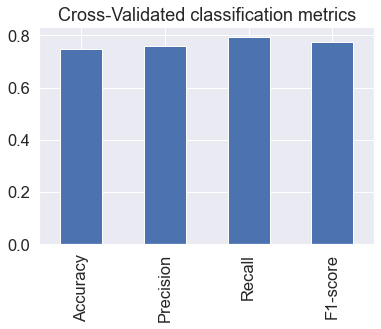

In [58]:
# visualize cross validated metrics

cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1-score': cv_f1
},index=[0])

cv_metrics.T.plot.bar(title = "Cross-Validated classification metrics",legend = False)

In [59]:
np.random.seed(2)
rf_model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
rf_model.fit(X_train, y_train)
print(rf_model.score(X_test,y_test))

0.8360655737704918


In [60]:
y_preds = rf_model.predict(X_test)
print("Accuracy : {}".format(accuracy_score(y_test,y_preds)))
rf_report = classification_report(y_test,y_preds)
print(rf_report)

Accuracy : 0.8360655737704918
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [61]:
import joblib
joblib.dump(rf_model, 'heart_model.pkl')

['heart_model.pkl']

# Feature importance

In [62]:
clf = LogisticRegression(C = 0.20433597178569418,solver = 'liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [63]:
# check coef_
clf.coef_

array([[-2.58772454e-02,  6.16878490e-01, -1.40905570e-02,
        -6.33118860e-04, -2.18681442e-02,  1.87287263e-01,
         2.19521022e-02, -8.91725810e-01]])

In [64]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': -0.025877245375876903,
 'sex': 0.6168784902559983,
 'cp': -0.0140905570141725,
 'trestbps': -0.0006331188600616232,
 'chol': -0.021868144176736336,
 'fbs': 0.1872872630946877,
 'restecg': 0.021952102207673213,
 'thalach': -0.8917258098066208}

<AxesSubplot:title={'center':'Feature Importance'}>

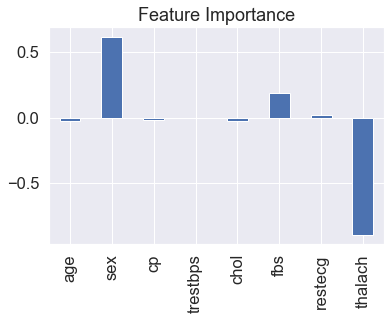

In [65]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False)

In [66]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [67]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
